In [1]:
import os
import shutil
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive

  os.makedirs('./datasets', exist_ok=True)
  drive.mount('/content/drive')

  shutil.copy('/content/drive/MyDrive/DataScience/Analytics/Estudo Fraude/df_train_test.parquet','/content/datasets/')
  shutil.copy('/content/drive/MyDrive/DataScience/Analytics/Estudo Fraude/df_validation.parquet','/content/datasets/')

Mounted at /content/drive


In [3]:
df = pl.concat([pl.read_parquet('./datasets/df_train_test.parquet'), pl.read_parquet('./datasets/df_validation.parquet')])
df.head()

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,target,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
i64,datetime[ns],i64,i64,f64,str,i64,str,str,f64,str,str,str,str,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,i64,i64,str,str,i64,str,i64,str,i64,f64,str,i64,str
7475327,2010-01-01 00:01:00,1556,2972,-77.0,"""Swipe Transaction""",59935,"""Beulah""","""ND""",58523.0,"""5499""",null,"""Miscellaneous Food Stores""","""No""",30,67,1989,7,"""Female""","""594 Mountain View Street""",46.8,-100.76,23679.0,48277.0,110153.0,740,4,"""Mastercard""","""Debit (Prepaid)""",5497590243197280,"""07/2022""",306,"""YES""",2,55.0,"""05/2008""",2008,"""No"""
7475328,2010-01-01 00:02:00,561,4575,14.57,"""Swipe Transaction""",67570,"""Bettendorf""","""IA""",52722.0,"""5311""",null,"""Department Stores""","""No""",48,67,1971,6,"""Male""","""604 Pine Street""",40.8,-91.12,18076.0,36853.0,112139.0,834,5,"""Mastercard""","""Credit""",5175842699412235,"""12/2024""",438,"""YES""",1,9100.0,"""09/2005""",2015,"""No"""
7475329,2010-01-01 00:02:00,1129,102,80.0,"""Swipe Transaction""",27092,"""Vista""","""CA""",92084.0,"""4829""",null,"""Money Transfer""","""No""",49,65,1970,4,"""Male""","""2379 Forest Lane""",33.18,-117.29,16894.0,34449.0,36540.0,686,3,"""Mastercard""","""Debit""",5874992802287595,"""05/2020""",256,"""YES""",1,14802.0,"""01/2006""",2008,"""No"""
7475332,2010-01-01 00:06:00,848,3915,46.41,"""Swipe Transaction""",13051,"""Harwood""","""MD""",20776.0,"""5813""",null,"""Drinking Places (Alcoholic Bev…","""No""",51,69,1968,5,"""Male""","""166 River Drive""",38.86,-76.6,33529.0,68362.0,96182.0,711,2,"""Visa""","""Debit""",4354185735186651,"""01/2020""",120,"""YES""",1,19113.0,"""07/2009""",2014,"""No"""
7475333,2010-01-01 00:07:00,1807,165,4.81,"""Swipe Transaction""",20519,"""Bronx""","""NY""",10464.0,"""5942""",null,"""Book Stores""","""No""",47,65,1972,12,"""Female""","""14780 Plum Lane""",40.84,-73.87,25537.0,52065.0,98613.0,828,5,"""Mastercard""","""Debit (Prepaid)""",5207231566469664,"""03/2014""",198,"""YES""",1,89.0,"""01/2008""",2015,"""No"""


In [4]:
df = df.with_columns(
    pl.when(pl.col('merchant_city').str.to_lowercase() == 'online')
    .then(pl.lit('Yes'))
    .otherwise(pl.lit('No'))
    .alias('online_sales')
).with_columns(
    pl.when(pl.col('merchant_city').str.to_lowercase() == 'online')
    .then(pl.lit('Online'))
    .otherwise(pl.col('merchant_city'))
    .alias('city')
).with_columns(
    pl.when(pl.col('merchant_state').str.len_chars() == 2)
    .then(pl.lit('United States'))
    .otherwise(pl.col('merchant_state'))
    .alias('country')
    .fill_null('Online')
)
df.sample(5)

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,target,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,online_sales,city,country
i64,datetime[ns],i64,i64,f64,str,i64,str,str,f64,str,str,str,str,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,i64,i64,str,str,i64,str,i64,str,i64,f64,str,i64,str,str,str,str
22277416,2018-12-21 14:37:00,1571,5397,17.98,"""Chip Transaction""",26815,"""Hendersonville""","""TN""",37075.0,"""7542""",null,"""Car Washes""","""No""",58,66,1961,6,"""Female""","""385 Jefferson Avenue""",36.29,-86.6,25166.0,51316.0,0.0,759,6,"""Visa""","""Debit""",4704455652130191,"""12/2023""",175,"""YES""",1,24827.0,"""11/2003""",2008,"""No""","""No""","""Hendersonville""","""United States"""
15401715,2014-12-17 04:12:00,709,5259,45.58,"""Swipe Transaction""",75857,"""Fort Atkinson""","""WI""",53538.0,"""5211""",null,"""Lumber and Building Materials""","""No""",26,66,1993,9,"""Female""","""3114 East Street""",42.92,-88.84,21057.0,42931.0,48783.0,742,3,"""Mastercard""","""Debit""",5953738621410056,"""12/2022""",144,"""YES""",1,27123.0,"""10/2012""",2012,"""No""","""No""","""Fort Atkinson""","""United States"""
21570592,2018-07-24 19:14:00,1825,4310,16.6,"""Chip Transaction""",75936,"""Aurora""","""CO""",80013.0,"""5814""",null,"""Fast Food Restaurants""","""No""",70,65,1949,9,"""Female""","""817 Ocean Avenue""",39.69,-104.81,24849.0,45754.0,9066.0,718,4,"""Visa""","""Debit""",4588131276802665,"""10/2020""",194,"""YES""",1,23878.0,"""08/2009""",2011,"""No""","""No""","""Aurora""","""United States"""
9148625,2011-02-13 07:20:00,1193,5962,3.46,"""Swipe Transaction""",91128,"""Callicoon""","""NY""",12723.0,"""5411""",null,"""Grocery Stores, Supermarkets""","""No""",90,75,1929,11,"""Female""","""6245 River Lane""",41.69,-73.92,27934.0,51717.0,418.0,717,5,"""Mastercard""","""Debit""",5429242008081571,"""12/2018""",151,"""YES""",1,17718.0,"""12/2009""",2010,"""No""","""No""","""Callicoon""","""United States"""
19007262,2017-01-27 14:48:00,208,2426,45.47,"""Chip Transaction""",22204,"""Federal Way""","""WA""",98023.0,"""5541""",null,"""Service Stations""","""No""",37,66,1982,7,"""Female""","""6976 Ocean View Avenue""",47.79,-122.2,33226.0,67747.0,76650.0,804,3,"""Visa""","""Debit""",4455787437333576,"""11/2023""",216,"""YES""",2,23834.0,"""04/2001""",2014,"""No""","""No""","""Federal Way""","""United States"""


In [5]:
def floor_to_15min(dt_value: datetime) -> datetime|None:
    if dt_value is None:
        return None

    seconds_since_midnight = (dt_value - dt_value.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
    interval_seconds = 15 * 60
    floored_seconds = (seconds_since_midnight // interval_seconds) * interval_seconds
    return dt_value.replace(hour=0, minute=0, second=0, microsecond=0) + timedelta(seconds=floored_seconds)

In [6]:
df = df.with_columns(
    pl.col("date").map_elements(floor_to_15min, return_dtype=pl.Datetime).alias("date_window")
)

In [7]:
def generate_columns_statistics(column_name: str) -> list:
    return [
        pl.col(column_name).mean().alias(f'mean_{column_name}'),
        # pl.col(column_name).median().alias(f'median_{column_name}'),
        pl.col(column_name).std().alias(f'std_{column_name}'),
        pl.col(column_name).skew().alias(f'skew_{column_name}'),
        pl.col(column_name).kurtosis().alias(f'kurtosis_{column_name}')
    ]

In [8]:
df = df.with_columns(
    pl.when(pl.col('target') == 'Yes').then(1).otherwise(0).alias('target')
)

In [9]:
aggregate = [pl.col('amount').count().alias('transactions'), pl.col('target').sum().alias('frauds')]
for column in ['amount', 'current_age', 'per_capita_income', 'total_debt', 'credit_score', 'num_credit_cards', 'credit_limit']:
  aggregate.extend(generate_columns_statistics(column))

In [10]:
def list_structs_to_dict(list_of_structs, column_name):
  if list_of_structs is None:
      return None

  items = {}
  for item in list_of_structs:
    key = item[column_name]
    value = round(item['proportion'], 2)
    items[key] = value

  return items

def convert_categorical_to_percent(df: pl.DataFrame, column_name: str, group_by_column) -> pl.DataFrame:
  list_structs_to_dict_column = lambda items: list_structs_to_dict(items, column_name)

  df_group = df.group_by(group_by_column).agg(pl.col(column_name).value_counts(normalize=True)).sort(group_by_column)

  df_fields = df_group.with_columns(
    pl.col(column_name).map_elements(
        list_structs_to_dict_column,
        return_dtype=pl.Object
  ).alias(column_name))

  fields = df_fields[column_name].to_list()
  data = pd.DataFrame(fields).fillna(0.0)
  data.columns = [f'{column_name}_{col.lower().replace(" ", "_")}' for col in data.columns]
  # data[group_by_column] = df_fields[group_by_column].to_list()
  data = pl.from_pandas(data)
  data = data.with_columns(df_fields[group_by_column].alias(group_by_column))
  return data

In [11]:
df_model = df.group_by('date_window').agg(
    *aggregate
).sort('date_window')
df_model.head()

date_window,transactions,frauds,mean_amount,std_amount,skew_amount,kurtosis_amount,mean_current_age,std_current_age,skew_current_age,kurtosis_current_age,mean_per_capita_income,std_per_capita_income,skew_per_capita_income,kurtosis_per_capita_income,mean_total_debt,std_total_debt,skew_total_debt,kurtosis_total_debt,mean_credit_score,std_credit_score,skew_credit_score,kurtosis_credit_score,mean_num_credit_cards,std_num_credit_cards,skew_num_credit_cards,kurtosis_num_credit_cards,mean_credit_limit,std_credit_limit,skew_credit_limit,kurtosis_credit_limit
datetime[μs],u32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2010-01-01 00:00:00,6,0,15.875,52.737742,-0.760483,-0.139116,46.833333,8.841191,-1.241314,0.444023,21897.166667,7198.264219,0.522412,-0.861983,93656.666667,28711.635012,-1.594374,0.842529,763.5,61.29845,0.001812,-1.536333,4.0,1.264911,-0.649519,-1.125,7200.833333,8439.396078,0.381076,-1.520432
2010-01-01 00:15:00,4,0,22.2625,22.245049,0.012927,-1.980469,49.5,16.663333,-0.134765,-1.560644,24534.0,1301.539345,0.354425,-1.461239,60605.5,59834.776479,-0.01997,-1.967191,724.5,24.310492,-0.830693,-0.974824,4.25,0.957427,-0.493382,-1.371901,12608.5,13718.592311,0.010111,-1.972188
2010-01-01 00:30:00,10,0,34.644,45.188942,-0.779579,0.46044,48.6,4.993329,-0.461034,0.602038,21695.6,6709.572916,0.674351,-0.812142,56477.3,48226.48252,0.235514,-1.124026,700.3,63.4421,-1.464207,2.09804,3.8,1.316561,-0.541972,0.607495,19807.9,6338.6096,0.114952,-1.629159
2010-01-01 00:45:00,6,0,15.388333,14.262798,0.910151,-0.471315,70.5,18.251027,0.262932,-1.015413,19808.166667,3592.733245,0.927645,-0.439468,40391.666667,51012.043302,0.59751,-1.399093,772.166667,41.421814,-0.0949,-1.491414,5.333333,1.632993,-0.279508,-1.365,17533.666667,11039.367893,-0.713338,-1.100947
2010-01-01 01:00:00,6,0,101.018333,97.728056,0.816882,-0.48396,54.5,9.648834,0.573632,-1.012784,26342.666667,15248.228011,1.251008,0.412107,67331.166667,35267.904737,0.400987,-1.525858,730.333333,83.946809,0.055991,-1.513659,3.833333,1.47196,-0.519038,-1.56071,23233.333333,20657.262681,1.339601,0.337726


In [12]:
for column in ['use_chip', 'gender', 'card_brand', 'card_type', 'has_chip', 'online_sales']:
  df_field = convert_categorical_to_percent(df, column, 'date_window')
  df_model = df_model.join(df_field, on='date_window', how='left')
df_model.head(10)

date_window,transactions,frauds,mean_amount,std_amount,skew_amount,kurtosis_amount,mean_current_age,std_current_age,skew_current_age,kurtosis_current_age,mean_per_capita_income,std_per_capita_income,skew_per_capita_income,kurtosis_per_capita_income,mean_total_debt,std_total_debt,skew_total_debt,kurtosis_total_debt,mean_credit_score,std_credit_score,skew_credit_score,kurtosis_credit_score,mean_num_credit_cards,std_num_credit_cards,skew_num_credit_cards,kurtosis_num_credit_cards,mean_credit_limit,std_credit_limit,skew_credit_limit,kurtosis_credit_limit,use_chip_swipe_transaction,use_chip_online_transaction,use_chip_chip_transaction,gender_male,gender_female,card_brand_mastercard,card_brand_visa,card_brand_amex,card_brand_discover,card_type_debit,card_type_credit,card_type_debit_(prepaid),has_chip_yes,has_chip_no,online_sales_yes,online_sales_no
datetime[μs],u32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2010-01-01 00:00:00,6,0,15.875,52.737742,-0.760483,-0.139116,46.833333,8.841191,-1.241314,0.444023,21897.166667,7198.264219,0.522412,-0.861983,93656.666667,28711.635012,-1.594374,0.842529,763.5,61.29845,0.001812,-1.536333,4.0,1.264911,-0.649519,-1.125,7200.833333,8439.396078,0.381076,-1.520432,0.83,0.17,0.0,0.67,0.33,0.83,0.17,0.0,0.0,0.33,0.17,0.5,1.0,0.0,0.17,0.83
2010-01-01 00:15:00,4,0,22.2625,22.245049,0.012927,-1.980469,49.5,16.663333,-0.134765,-1.560644,24534.0,1301.539345,0.354425,-1.461239,60605.5,59834.776479,-0.01997,-1.967191,724.5,24.310492,-0.830693,-0.974824,4.25,0.957427,-0.493382,-1.371901,12608.5,13718.592311,0.010111,-1.972188,1.0,0.0,0.0,0.75,0.25,0.25,0.75,0.0,0.0,0.75,0.0,0.25,0.75,0.25,0.0,1.0
2010-01-01 00:30:00,10,0,34.644,45.188942,-0.779579,0.46044,48.6,4.993329,-0.461034,0.602038,21695.6,6709.572916,0.674351,-0.812142,56477.3,48226.48252,0.235514,-1.124026,700.3,63.4421,-1.464207,2.09804,3.8,1.316561,-0.541972,0.607495,19807.9,6338.6096,0.114952,-1.629159,0.8,0.2,0.0,0.5,0.5,0.8,0.2,0.0,0.0,0.6,0.4,0.0,1.0,0.0,0.2,0.8
2010-01-01 00:45:00,6,0,15.388333,14.262798,0.910151,-0.471315,70.5,18.251027,0.262932,-1.015413,19808.166667,3592.733245,0.927645,-0.439468,40391.666667,51012.043302,0.59751,-1.399093,772.166667,41.421814,-0.0949,-1.491414,5.333333,1.632993,-0.279508,-1.365,17533.666667,11039.367893,-0.713338,-1.100947,0.83,0.17,0.0,0.5,0.5,0.5,0.33,0.17,0.0,0.67,0.17,0.17,1.0,0.0,0.17,0.83
2010-01-01 01:00:00,6,0,101.018333,97.728056,0.816882,-0.48396,54.5,9.648834,0.573632,-1.012784,26342.666667,15248.228011,1.251008,0.412107,67331.166667,35267.904737,0.400987,-1.525858,730.333333,83.946809,0.055991,-1.513659,3.833333,1.47196,-0.519038,-1.56071,23233.333333,20657.262681,1.339601,0.337726,0.5,0.5,0.0,0.33,0.67,0.83,0.17,0.0,0.0,0.67,0.33,0.0,1.0,0.0,0.5,0.5
2010-01-01 01:15:00,5,0,4.61,53.67871,-0.468739,-0.482601,43.6,7.402702,-0.754216,-0.771215,23935.4,3065.888664,0.013807,-0.528075,81437.8,28100.092281,1.039823,-0.491354,754.0,56.178288,1.098869,-0.206714,3.0,1.0,0.0,-1.75,14693.8,4012.619369,-0.062165,-1.724288,1.0,0.0,0.0,0.2,0.8,0.6,0.4,0.0,0.0,0.6,0.4,0.0,0.8,0.2,0.0,1.0
2010-01-01 01:30:00,4,0,17.535,17.586155,0.425266,-1.453984,67.0,20.314199,0.318187,-1.563732,25778.5,6119.646749,-0.905558,-0.842706,30717.5,34917.933869,0.121262,-1.83475,747.0,52.36411,0.19568,-1.262078,6.25,0.5,1.154701,-0.666667,24618.5,11453.384085,0.474271,-1.360883,1.0,0.0,0.0,0.0,1.0,0.75,0.0,0.25,0.0,0.75,0.25,0.0,1.0,0.0,0.0,1.0
2010-01-01 01:45:00,7,0,51.992857,34.98547,1.019653,-0.01202,56.428571,11.544943,-0.075079,-1.292404,25930.0,12385.902524,1.407045,0.814717,51734.285714,42299.149521,0.614604,-0.406747,726.285714,37.187427,-0.51775,-0.245965,4.285714,1.704336,-0.040073,-1.64781,21924.571429,25060.956213,1.683264,1.455575,0.57,0.43,0.0,0.43,0.57,0.57,0.29,0.14,0.0,0.71,0.14,0.14,1.0,0.0,0.43,0.57
2010-01-01 02:00:00,9,0,45.843333,68.940091,1.30041,0.377724,50.0,21.75431,1.6103

In [13]:
corr = df_model.to_pandas().corr()
corr

,date_window,transactions,frauds,mean_amount,std_amount,skew_amount,kurtosis_amount,mean_current_age,std_current_age,skew_current_age,...,card_brand_visa,card_brand_amex,card_brand_discover,card_type_debit,card_type_credit,card_type_debit_(prepaid),has_chip_yes,has_chip_no,online_sales_yes,online_sales_no
date_window,1.000000,0.054727,0.008353,-0.009860,-0.007431,0.014646,0.027630,-0.083841,0.050596,-0.042330,...,0.003795,-0.031872,-0.003206,0.037247,-0.035455,-0.006673,0.003804,-0.003794,0.052300,-0.052305
transactions,0.054727,1.000000,0.144195,-0.207486,-0.042427,0.209899,0.479446,0.071177,0.167515,0.229943,...,-0.012239,-0.011232,-0.021169,0.042953,-0.039239,-0.008966,-0.036913,0.036811,-0.181144,0.181031
frauds,0.008353,0.144195,1.000000,-0.013223,0.015787,0.054092,0.084733,0.015555,0.022956,0.019535,...,-0.003043,-0.003920,-0.001955,0.002030,-0.003955,0.003339,-0.003786,0.003754,0.016404,-0.016429
mean_amount,-0.009860,-0.207486,-0.013223,1.000000,0.467603,0.322003,0.029714,-0.005831,-0.020709,-0.067792,...,0.018018,0.034694,0.023750,-0.074679,0.128033,-0.087855,0.000264,-0.000244,0.108532,-0.108504
std_amount,-0.007431,-0.042427,0.015787,0.467603,1.000000,0.236284,0.405003,-0.001105,-0.004093,-0.017168,...,0.013758,0.029551,0.028186,-0.057599,0.098166,-0.067580,0.001790,-0.001795,0.021786,-0.021771
skew_amount,0.014646,0.209899,0.054092,0.322003,0.236284,1.000000,0.516563,0.022977,0.045157,0.048170,...,-0.002330,-0.004926,-0.005260,0.003576,-0.011099,0.013604,-0.010863,0.010813,-0.016494,0.016478
kurtosis_amount,0.027630,0.479446,0.084733,0.029714,0.405003,0.516563,1.000000,0.034486,0.087633,0.119764,...,-0.005462,-0.003835,-0.004604,0.014807,-0.009134,-0.010523,-0.021958,0.021886,-0.091600,0.091556
mean_current_age,-0.083841,0.071177,0.015555,-0.005831,-0.001105,0.022977,0.034486,1.000000,0.392399,-0.136432,...,0.010231,-0.005448,0.019068,0.003862,-0.000828,-0.005563,-0.018420,0.018408,0.021857,-0.021865
std_current_age,0.050596,0.167515,0.022956,-0.020709,-0.004093,0.045157,0.087633,0.392399,1.000000,0.191441,...,-0.030964,-0.018907,0.030764,0.017081,-0.016065,-0.002990,0.014277,-0.014293,-0.027265,0.027246
skew_current_age,-0.042330,0.229943,0.019535,-0.067792,-0.017168,0.048170,0.119764,-0.136432,0.191441,1.000000,...,0.004251,0.005440,0.002942,-0.002315,0.000224,0.004575,-0.003432,0.003412,-0.062637,0.062616


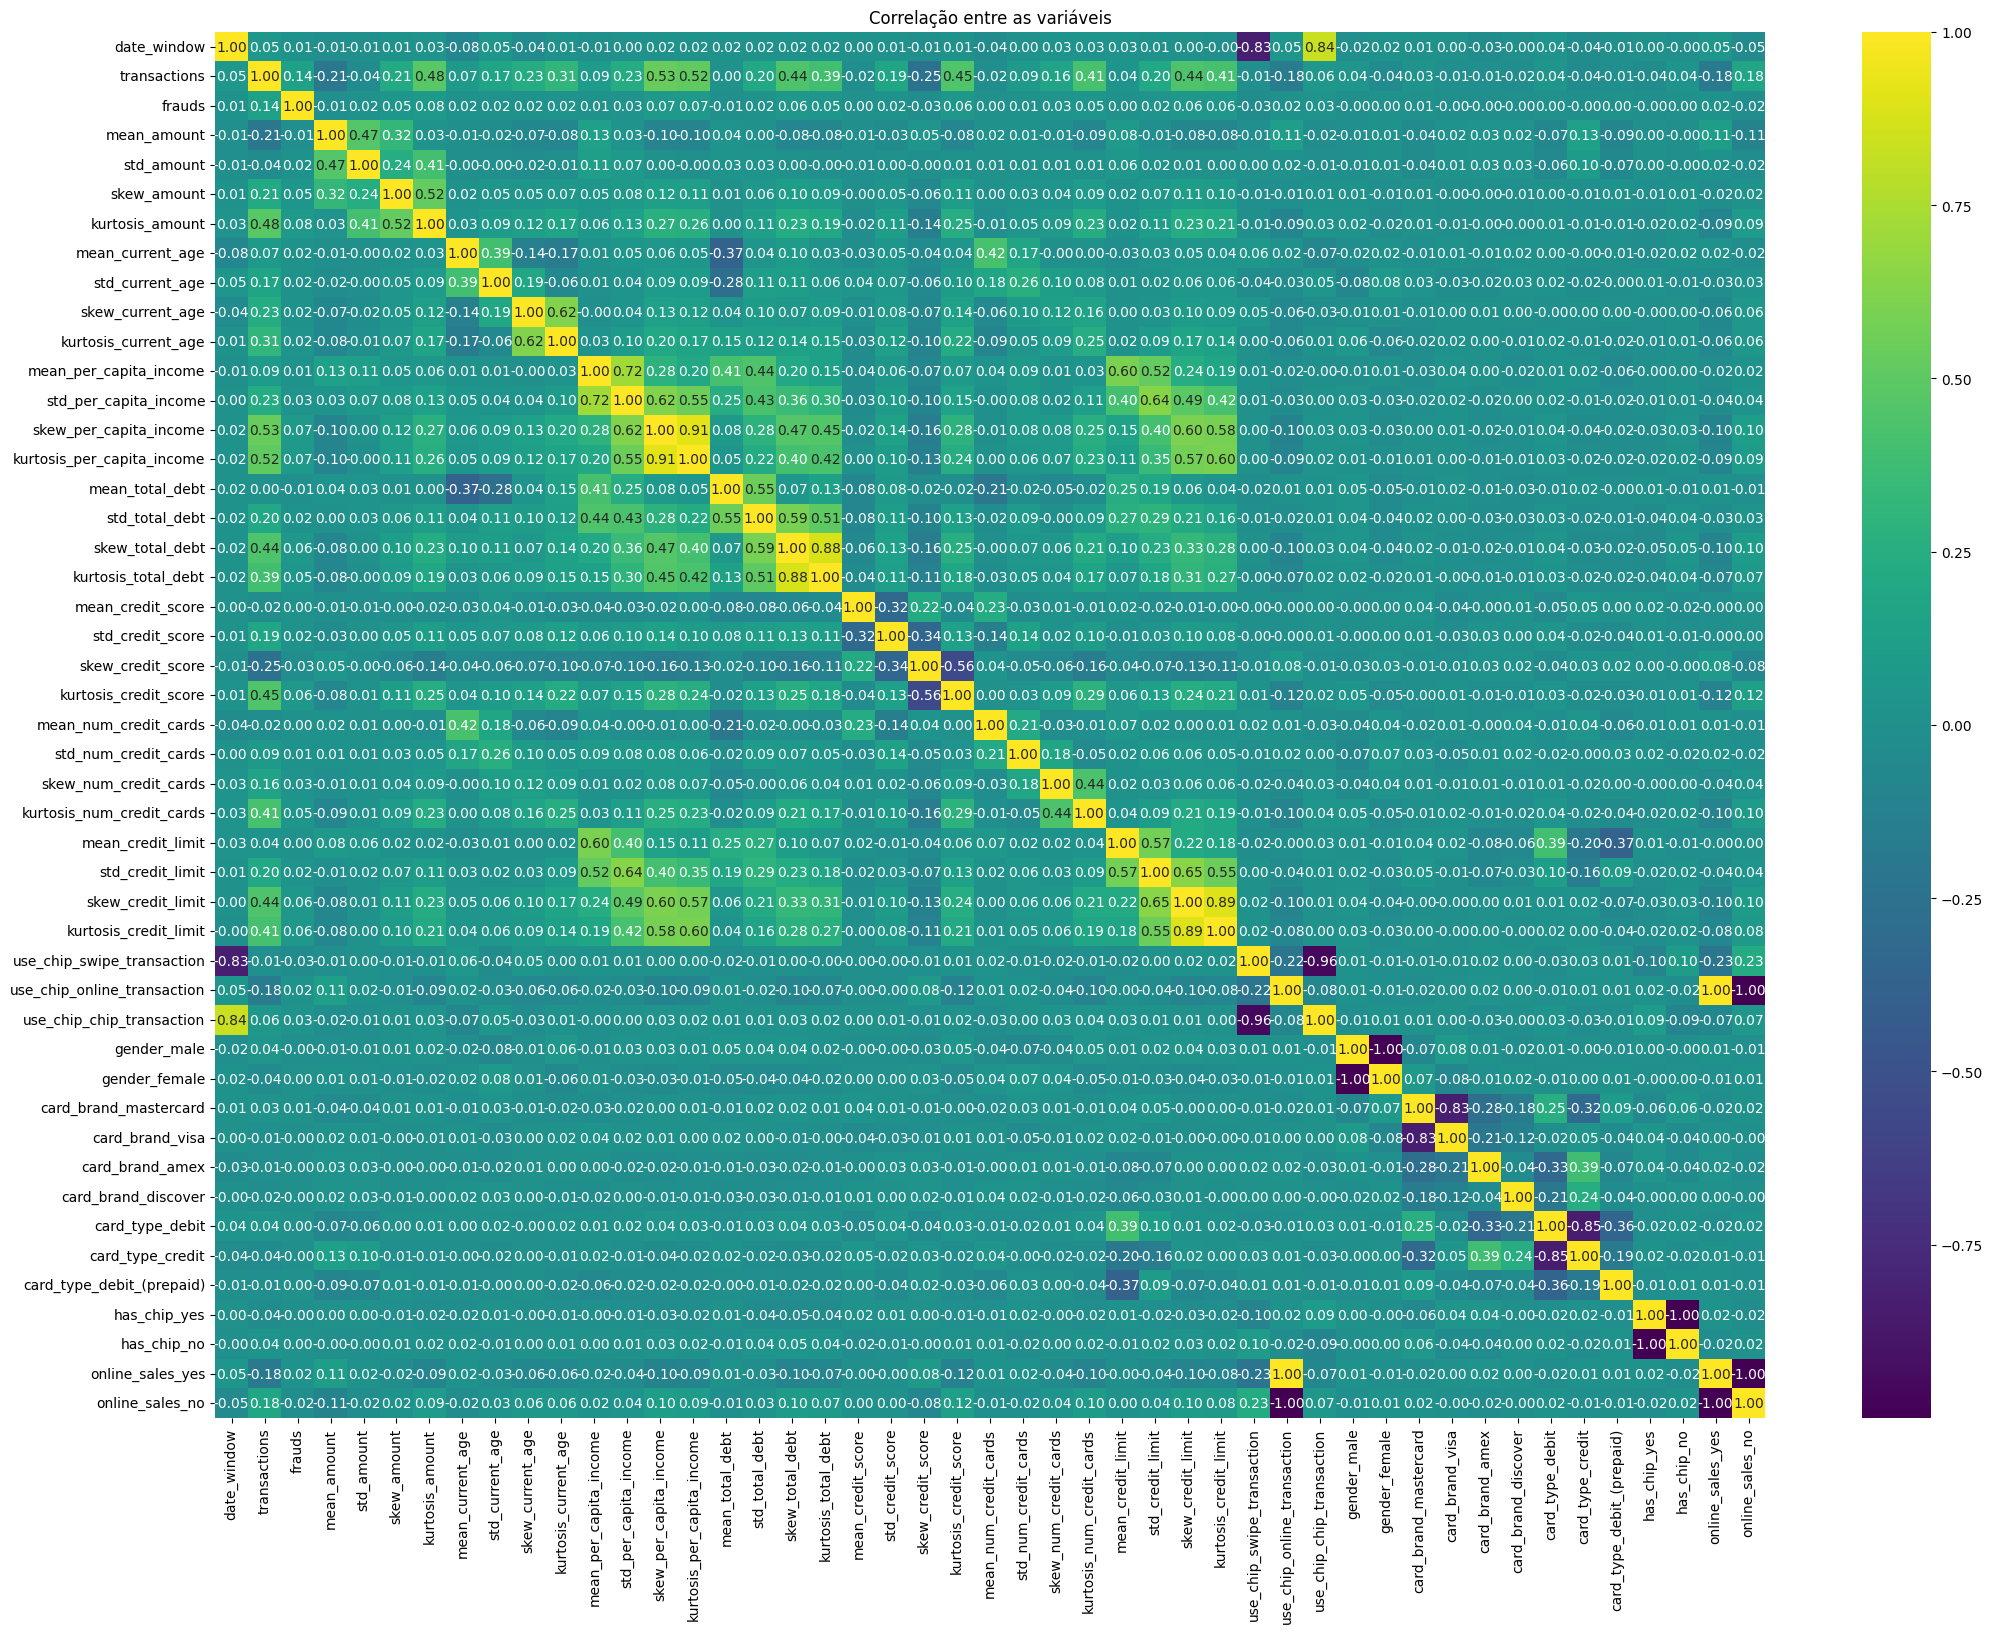

In [14]:
plt.figure(figsize=(25,18))
plt.title('Correlação entre as variáveis')

sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')

plt.show()

In [15]:
df_proportion = df['description'].value_counts(normalize=True).sort('proportion', descending=True)
df_proportion.filter(pl.col('proportion') >= 0.01)

description,proportion
str,f64
"""Grocery Stores, Supermarkets""",0.119668
"""Miscellaneous Food Stores""",0.10986
"""Service Stations""",0.107137
"""Eating Places and Restaurants""",0.075133
"""Drug Stores and Pharmacies""",0.058037
…,…
"""Utilities - Electric, Gas, Wat…",0.018213
"""Book Stores""",0.017474
"""Telecommunication Services""",0.016404


In [16]:
df.group_by("description").agg([
    pl.sum("amount").alias("total_amount"),
    pl.len().alias("transaction_count"),
]).with_columns(
    (
        2 / (1 / pl.col("total_amount") + 1 / pl.col("transaction_count"))
    ).alias("harmonic_mean_metrics")
).with_columns(
    (pl.col("total_amount") / pl.col("transaction_count")).alias("average_amount_per_transaction")
).join(df_proportion, on='description', how='left').to_pandas()

,description,total_amount,transaction_count,harmonic_mean_metrics,average_amount_per_transaction,proportion
0,Drug Stores and Pharmacies,23495744.42,517400,1.012504e+06,45.411180,0.058037
1,Book Stores,2994960.14,155782,2.961594e+05,19.225329,0.017474
2,"Recreational Sports, Clubs",1720319.58,10749,2.136451e+04,160.044616,0.001206
3,Hardware Stores,962563.48,23807,4.646479e+04,40.431952,0.002670
4,Miscellaneous Home Furnishing Stores,2874754.69,57608,1.129525e+05,49.902005,0.006462
...,...,...,...,...,...,...
103,"Detective Agencies, Security Services",264255.75,8507,1.648336e+04,31.063330,0.000954
104,Cleaning and Maintenance Services,1454579.62,34215,6.685736e+04,42.512922,0.003838
105,"Tools, Parts, Supplies Manufacturing",1486756.63,2025,4.044491e+03,734.200805,0.000227
106,Cosmetic Stores,51666.78,4397,8.104299e+03,11.750462,0.000493
